In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
salary = pd.read_csv('C://Users//sharv//Projects//DATA//Employee_salary.csv')

In [3]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [5]:
X = salary[['Years of Experience']] #training on this col

In [6]:
y = salary['Salary'] #needs to be predicted by our model

In [7]:
X_train = X
y_train = y

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression(fit_intercept = False)

In [10]:
regressor.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [11]:
predicted = regressor.predict(X_train)

In [12]:
print('Linear Model Coefficient(m):',regressor.coef_)
print('Linear Model Intercept(c):',regressor.intercept_)

Linear Model Coefficient(m): [10511.28514602]
Linear Model Intercept(c): 0.0


In [13]:
# lets plot the line to see how it fits the data

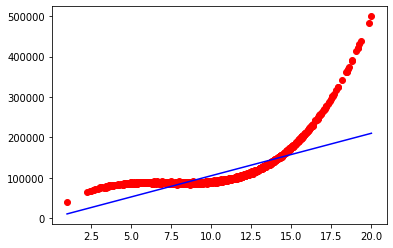

In [14]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,predicted, color='blue')

In [15]:
# Therefore linear regression wont work well

In [16]:
# Trying polynomial regression starting with degree 2

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)

In [18]:
X_columns = poly_features.fit_transform(X_train)

In [19]:
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [20]:
regressor = LinearRegression(fit_intercept = False)

In [21]:
regressor.fit(X_columns,y_train)

LinearRegression(fit_intercept=False)

In [22]:
print('Linear Model Coefficient(m):',regressor.coef_)

Linear Model Coefficient(m): [207045.95366531 -33106.32895617   2095.78613853]


In [23]:
print('Linear Model Intercept(c):',regressor.intercept_)

Linear Model Intercept(c): 0.0


In [27]:
y_predict = regressor.predict(X_columns)
y_predict

array([176035.41084766, 142978.73429447, 138495.41274285, ...,
       351309.70152322, 375297.5979639 , 383233.82995221])

Text(0.5, 1.0, 'Salary vs Years of Experience')

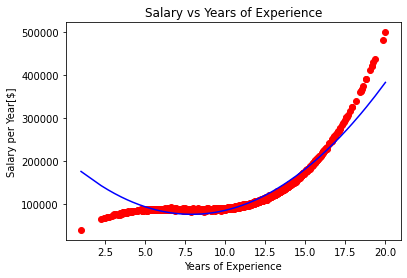

In [29]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,y_predict, color='blue')
plt.ylabel('Salary per Year[$]')
plt.xlabel('Years of Experience')
plt.title('Salary vs Years of Experience')

In [30]:
# Degree 2 works but we can do better

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3)

In [33]:
X_columns = poly_features.fit_transform(X_train)
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03]])

In [34]:
regressor = LinearRegression(fit_intercept = False)

In [35]:
regressor.fit(X_columns,y_train)

LinearRegression(fit_intercept=False)

In [36]:
print('Linear Model Coefficient(m):',regressor.coef_)

Linear Model Coefficient(m): [12053.10740865 32261.24327461 -4503.00578987   205.20736238]


In [37]:
print('Linear Model Intercept(c):',regressor.intercept_)

Linear Model Intercept(c): 0.0


In [38]:
y_predict = regressor.predict(X_columns)
y_predict

array([ 40016.55225575,  64301.71905172,  67093.82572191, ...,
       437322.50153084, 482432.96441791, 497734.55596455])

Text(0.5, 1.0, 'Salary vs Years of Experience')

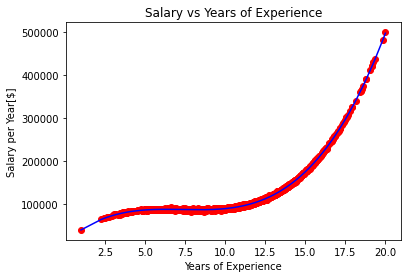

In [39]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,y_predict, color='blue')
plt.ylabel('Salary per Year[$]')
plt.xlabel('Years of Experience')
plt.title('Salary vs Years of Experience')

In [41]:
#Degree 3 fits perfectly

In [40]:
# We can use cross valdiation to find perfectly fitting degree